In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import nltk
from nltk import FreqDist

In [2]:
words = pd.read_csv("words.csv")

Enter the character Elizabeth


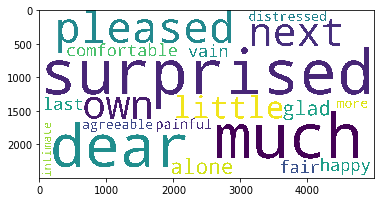

In [4]:
character = input("Enter the character ")
char_mention = pd.Series(words.loc[words['word'] == character].index)
words.loc[2]['POS'] == 'ADJ'

char_temp = pd.DataFrame()
for t in range(len(char_mention)):
    i = char_mention[t] - 3
    j = char_mention[t] - 3
    while True:
        if((words.loc[j]['POS'] == 'ADJ') & (words.loc[j]['lemma'] != '-PRON-')):
            hrk = words.loc[j]
            char_temp = char_temp.append(hrk)
            j=j+1
        else:
            j=j+1
        if(j > i+6):
            break
adj_char = pd.Series(char_temp['word'])
adj_char = list(adj_char)

fdistk=FreqDist(adj_char)
myList = fdistk.most_common(20)

myDict = {}
for i in range(len(myList)):
    key = myList[i][0]
    myDict[key] = myList[i][1]
del myDict['other']
wc = WordCloud(background_color="white",width=5000,height=2500, max_words=20,relative_scaling=0.25,normalize_plurals=False).generate_from_frequencies(myDict)
plt.imshow(wc)